In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

connection = psycopg2.connect(
    dbname="postgres",
    user="postgres",
    password="123321",
    host="localhost",
    port="5432"
)

query = "SELECT * FROM your_table_name"
data = pd.read_sql_query(query, connection)

C:\Users\a2n19\AppData\Local\Temp\ipykernel_17376\1671241564.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, connection)


In [2]:
data['product_price'] = pd.to_numeric(data['product_price'], errors='coerce')

# Средняя цена по категориям продуктов

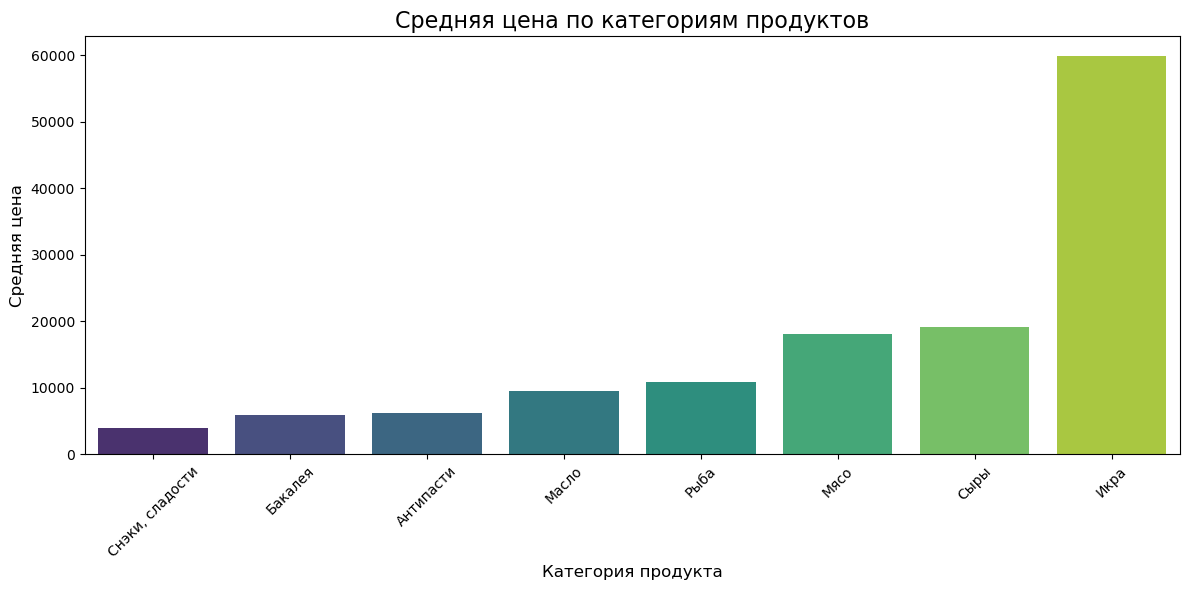

In [4]:
category_price = data.groupby('product_category')['product_price'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_price.index, y=category_price.values, palette="viridis")
plt.title('Средняя цена по категориям продуктов', fontsize=16)
plt.ylabel('Средняя цена', fontsize=12)
plt.xlabel('Категория продукта', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Количество продуктов по городам

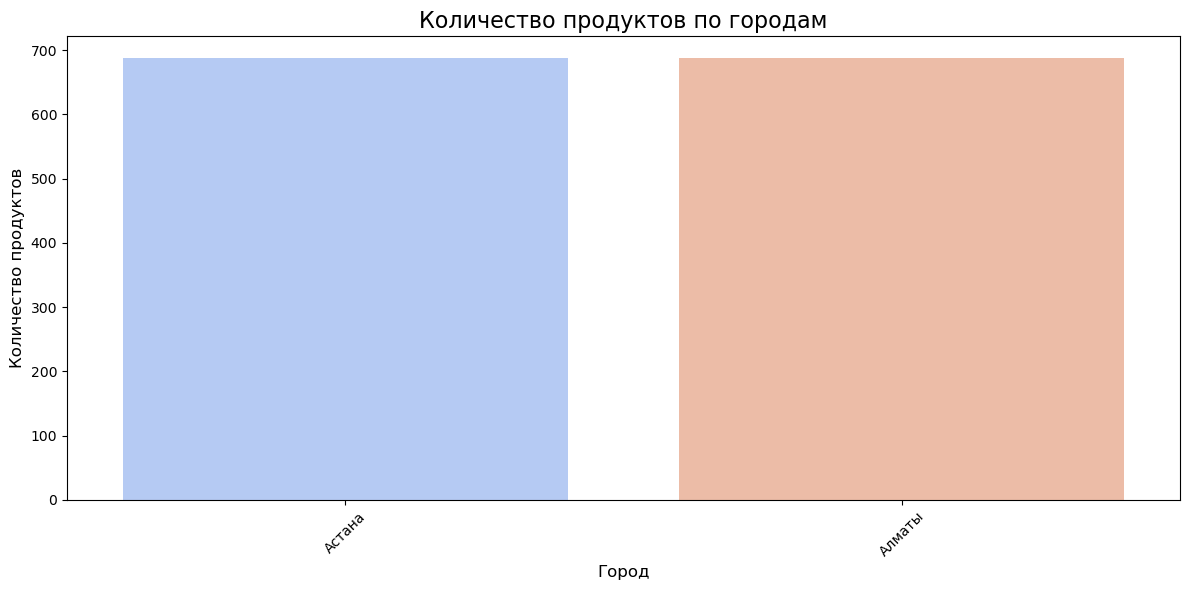

In [6]:
city_distribution = data['city'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=city_distribution.index, y=city_distribution.values, palette="coolwarm")
plt.title('Количество продуктов по городам', fontsize=16)
plt.ylabel('Количество продуктов', fontsize=12)
plt.xlabel('Город', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Распределение цен продуктов

E:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


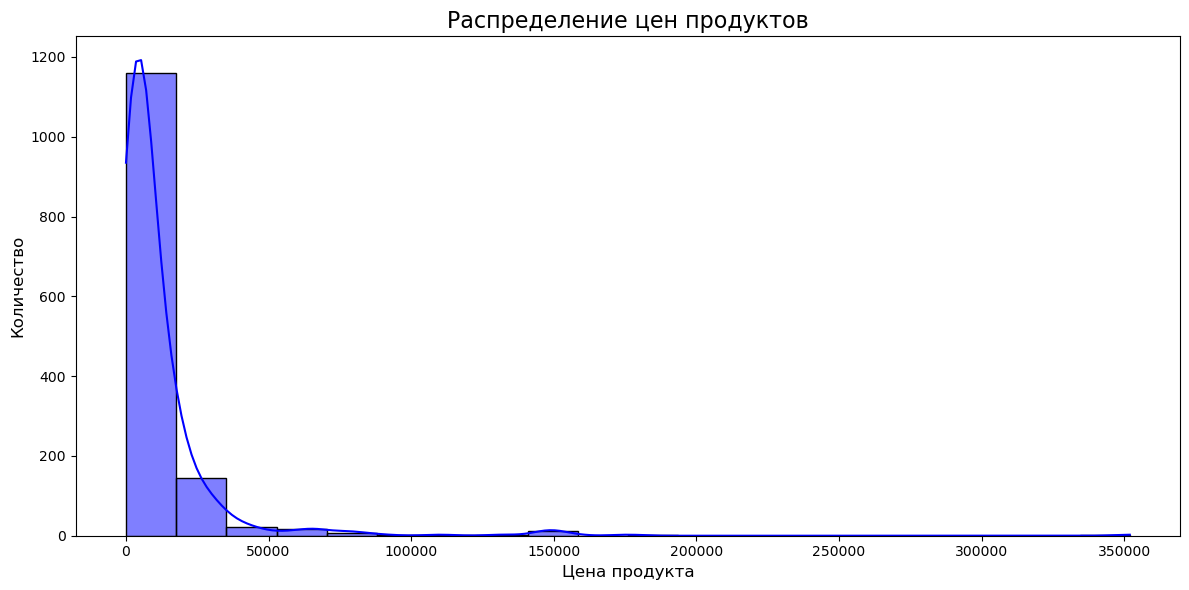

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(data['product_price'], kde=True, color='blue', bins=20)
plt.title('Распределение цен продуктов', fontsize=16)
plt.xlabel('Цена продукта', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.tight_layout()
plt.savefig('price_distribution.png')
plt.show()

# Связь цен и категорий продуктов

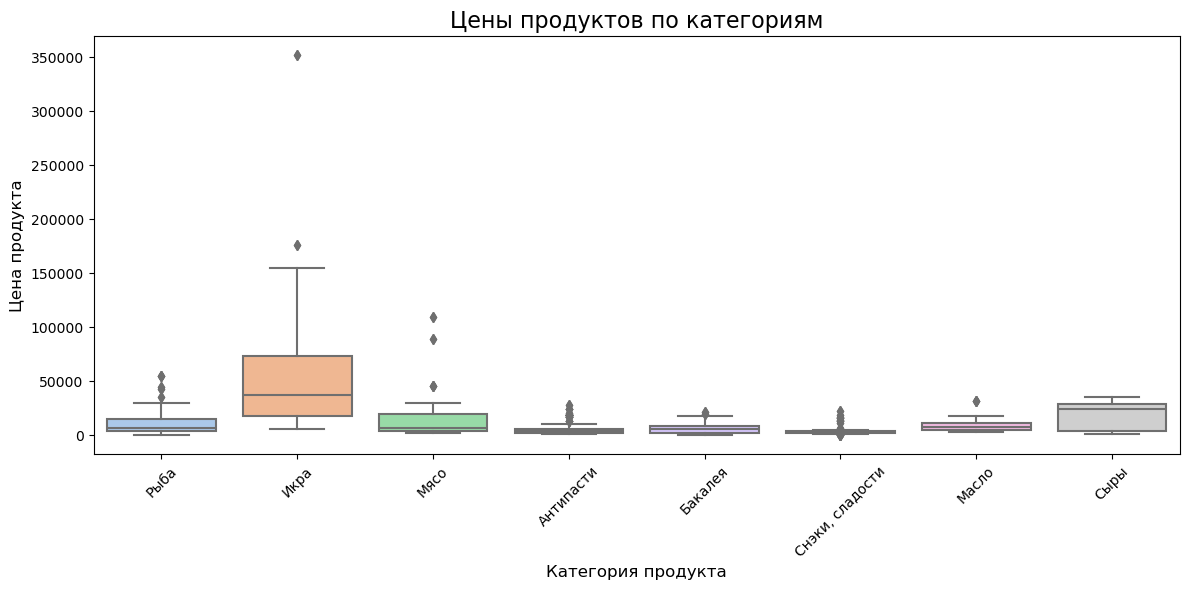

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category', y='product_price', data=data, palette="pastel")
plt.title('Цены продуктов по категориям', fontsize=16)
plt.xlabel('Категория продукта', fontsize=12)
plt.ylabel('Цена продукта', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('price_by_category_boxplot.png')
plt.show()


# Количество продуктов по диапазонам цен

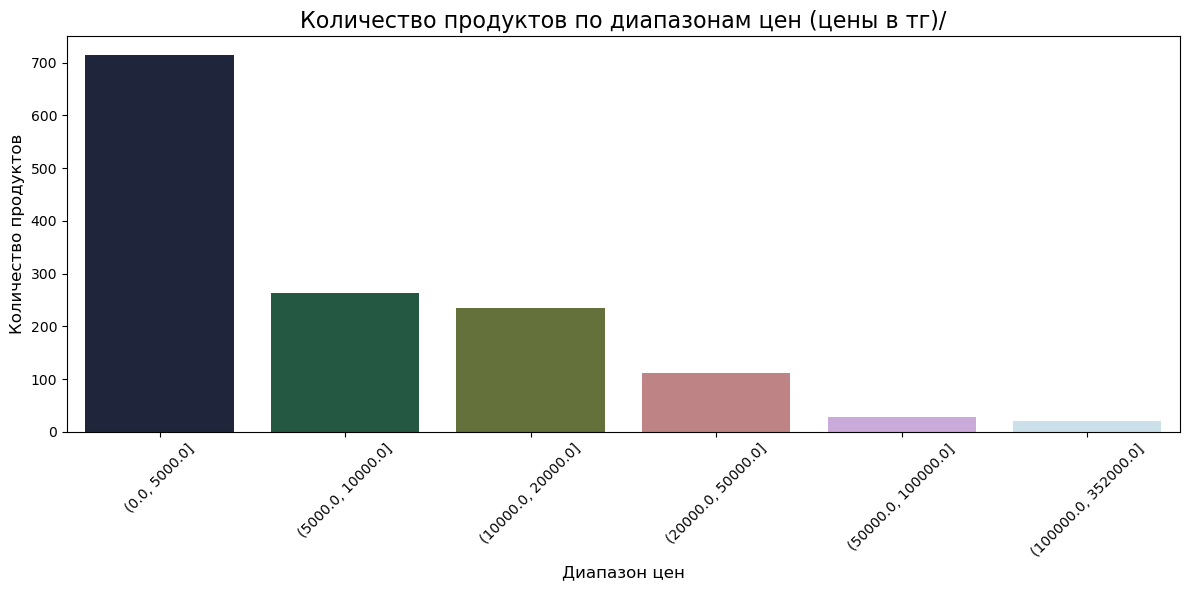

In [10]:
price_bins = [0, 5000, 10000, 20000, 50000, 100000, data['product_price'].max()]
data['price_range'] = pd.cut(data['product_price'], bins=price_bins)
price_range_distribution = data['price_range'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=price_range_distribution.index.astype(str), y=price_range_distribution.values, palette="cubehelix")
plt.title('Количество продуктов по диапазонам цен (цены в тг)/', fontsize=16)
plt.ylabel('Количество продуктов', fontsize=12)
plt.xlabel('Диапазон цен', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('product_count_by_price_range.png')
plt.show()

# Доля продуктов по категориям (круговая диаграмма)

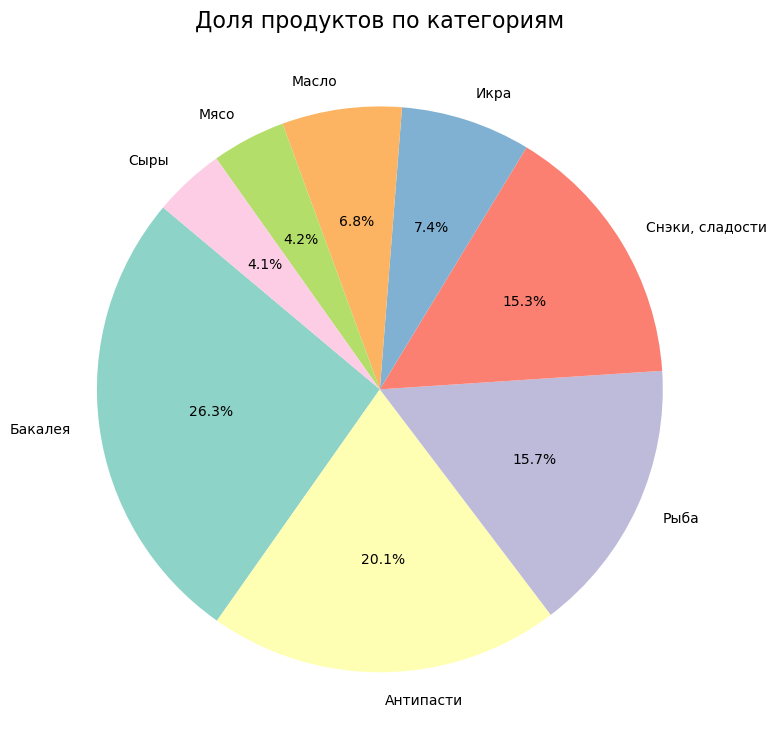

In [11]:
category_count = data['product_category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_count, labels=category_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Доля продуктов по категориям', fontsize=16)
plt.tight_layout()
plt.savefig('category_distribution_pie_chart.png')
plt.show()

# Топ-10 самых дорогих продуктов в каждом городе

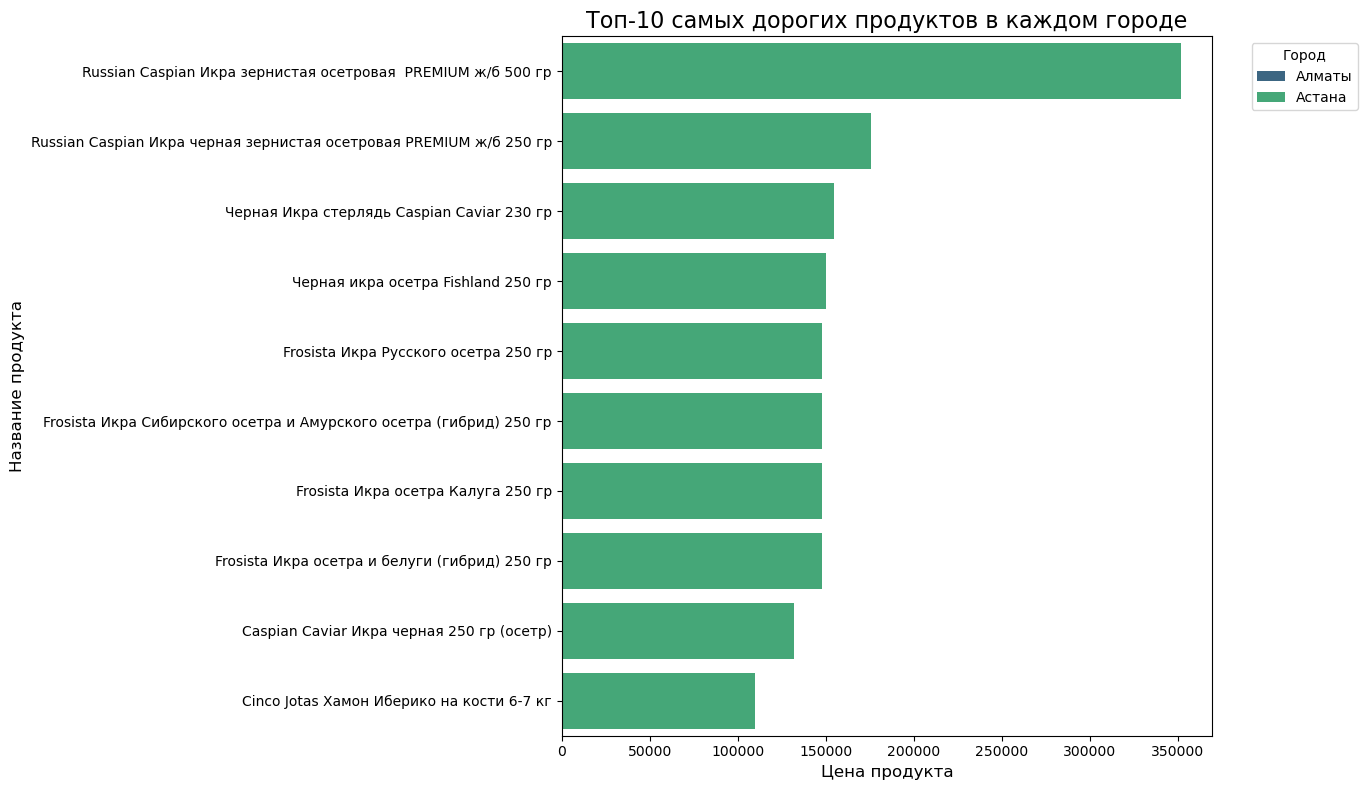

In [12]:
top_products_per_city = data.sort_values('product_price', ascending=False).groupby('city').head(10)

plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_products_per_city, 
    x='product_price', 
    y='product_name', 
    hue='city', 
    dodge=False, 
    palette="viridis"
)
plt.title('Топ-10 самых дорогих продуктов в каждом городе', fontsize=16)
plt.xlabel('Цена продукта', fontsize=12)
plt.ylabel('Название продукта', fontsize=12)
plt.legend(title='Город', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('top_10_expensive_products_per_city.png')
plt.show()